
<font color='red'>
<br>Content:
    
* [Introduction](#1)
* [Dataset EDA](#2)
* [Artificial Neural Network](#3)
    * [Train Test Split](#4)
    * [Parameters](#5)
    * [Forward Propagation](#6)
    * [Loss Function and Cost Function](#7)
    * [Backward Propagation](#8)
    * [Update Parameters](#9)
    * [Prediction](#10)
    * [Create Model](#11)
    * [Artificial Neural Network with Keras](#12)
    
    

<a id="1"></a> <br>
## Introduction


### What is Deep learning?

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. Deep learning is a machine learning technique that teaches computers to do what comes naturally to humans: learn by example. Deep learning is a key technology behind driverless cars, enabling them to recognize a stop sign, or to distinguish a pedestrian from a lamppost. It is the key to voice control in consumer devices like phones, tablets, TVs, and hands-free speakers. Deep learning is getting lots of attention lately and for good reason. It’s achieving results that were not possible before.




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


<a id="2"></a> <br>
## Dataset EDA

In [2]:
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
print(data.shape)
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
print(data.shape)


(569, 33)
(569, 31)


In [3]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values


In [4]:
x_data = data.drop(['diagnosis'], axis=1)
print(x_data.shape)

(569, 30)


In [5]:
#normalization
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
y = y.reshape(y.shape[0],1)
print("x shape: ",x.shape)
print("y shape: ",y.shape)

x shape:  (569, 30)
y shape:  (569, 1)


<a id="3"></a> <br>
## Artificial Neural Networks

### What are artificial neural networks

An artificial neuron network (ANN) is a computational model based on the structure and functions of biological neural networks. Information that flows through the network affects the structure of the ANN because a neural network changes - or learns, in a sense - based on that input and output. ANNs are considered nonlinear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. ANN is also known as a neural network.


A single neuron is known as a perceptron. It consists of a layer of inputs(corresponds to columns of a dataframe). Each input has a weight which controls the magnitude of an input. The summation of the products of these input values and weights is fed to the activation function. Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.


<a id="4"></a> <br>
## Train Test Split

In [6]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.15, random_state=42)



In [7]:
x_train = X_train.T
x_test = X_test.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (1, 483)
y test:  (1, 86)


<a id="5"></a> <br>
## Parameters

In [8]:
def weights_and_bias(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

<a id="6"></a> <br>
## Forward Propagation

In [9]:

def forward_propagation(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = 1/(1+np.exp(-Z2))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


<a id="7"></a> <br>
## Loss Function and Cost Function

In [10]:
# Compute cost
def compute_cost(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


<a id="8"></a> <br>
## Backward Propagation

In [11]:
# Backward Propagation
def backward_propagation(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<a id="9"></a> <br>
## Update Parameters

In [12]:
# update parameters
def update_parameters(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

<a id="10"></a> <br>
## Prediction 

In [13]:
# prediction
def predict(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="11"></a> <br>
## Create Model

In [14]:
def artificial_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = weights_and_bias(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation(x_train,parameters)
        # compute cost
        cost = compute_cost(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
            
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict(parameters,x_test)
    y_prediction_train = predict(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters



Cost after iteration 0: 0.256417
Cost after iteration 100: 0.277749
Cost after iteration 200: 0.294250
Cost after iteration 300: 0.306796
Cost after iteration 400: 0.316053
Cost after iteration 500: 0.322477
Cost after iteration 600: 0.326366
Cost after iteration 700: 0.327913
Cost after iteration 800: 0.327274
Cost after iteration 900: 0.324610
Cost after iteration 1000: 0.320115
Cost after iteration 1100: 0.314025
Cost after iteration 1200: 0.306597
Cost after iteration 1300: 0.298086
Cost after iteration 1400: 0.288697
Cost after iteration 1500: 0.278555
Cost after iteration 1600: 0.267719
Cost after iteration 1700: 0.256241
Cost after iteration 1800: 0.244242
Cost after iteration 1900: 0.231940
Cost after iteration 2000: 0.219621
Cost after iteration 2100: 0.207576
Cost after iteration 2200: 0.196054
Cost after iteration 2300: 0.185230
Cost after iteration 2400: 0.175208
Cost after iteration 2500: 0.166029
Cost after iteration 2600: 0.157685
Cost after iteration 2700: 0.150137
Cost

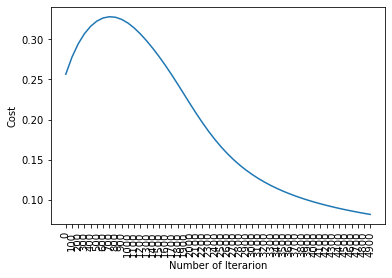

train accuracy: 96.68737060041408 %
test accuracy: 95.34883720930233 %


In [15]:
parameters = artificial_neural_network(x_train, y_train,x_test,y_test, num_iterations=5000)

<a id="12"></a> <br>
## Artificial Neural Network with Keras

In [16]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T


In [17]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense, Dropout# build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5963
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.6118
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6118
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.6118
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.6118
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.6180
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6242
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.6894
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7857
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.8075
Epoch 11/

11/11 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9534
Epoch 84/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9379
Epoch 85/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9596
Epoch 86/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9565
Epoch 87/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9565
Epoch 88/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9658
Epoch 89/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9658
Epoch 90/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9627
Epoch 91/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1364 - accuracy: 0.9472
Epoch 92/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9689
Epoch 93/100


11/11 [==============================] - 0s 3ms/step - loss: 0.1100 - accuracy: 0.9627
Epoch 65/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1189 - accuracy: 0.9565
Epoch 66/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.9503
Epoch 67/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9596
Epoch 68/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9503
Epoch 69/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.9534
Epoch 70/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9627
Epoch 71/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9503
Epoch 72/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9596
Epoch 73/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9596
Epoch 74/100


11/11 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9472
Epoch 46/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9565
Epoch 47/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9565
Epoch 48/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9627
Epoch 49/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9720
Epoch 50/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9720
Epoch 51/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9689
Epoch 52/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1108 - accuracy: 0.9627
Epoch 53/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.9596
Epoch 54/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9658
Epoch 55/100


In [18]:
print("First Accuracy : ", accuracies[0])
print("Second Accuracy : ", accuracies[0])
print("Third Accuracy : ", accuracies[0])

First Accuracy :  0.9875776171684265
Second Accuracy :  0.9875776171684265
Third Accuracy :  0.9875776171684265
